In [3]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.9 MB/s eta 0:00:00


In [4]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

# Preprocess Dataset

## Finetune Datasets

In [ ]:
dataset = load_dataset("ai2_arc", 'ARC-Challenge')

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'question', 'choices', 'answerKey'],
        num_rows: 1119
    })
    test: Dataset({
        features: ['id', 'question', 'choices', 'answerKey'],
        num_rows: 1172
    })
    validation: Dataset({
        features: ['id', 'question', 'choices', 'answerKey'],
        num_rows: 299
    })
})


In [ ]:
train_ds = dataset["train"]
valid_ds = dataset["validation"]
test_ds = dataset["test"]
print(train_ds)

Dataset({
    features: ['id', 'question', 'choices', 'answerKey'],
    num_rows: 1119
})


In [ ]:
def transform_arc_dataset(dataset, instruction_prompt):
    """
    Transforms the ARC dataset into the specified Pandas DataFrame format.

    Parameters:
    dataset (list): A list of dictionaries, each representing a question in the ARC dataset.

    Returns:
    pd.DataFrame: A DataFrame with two columns as specified.
    """
    transformed_data = []

    for entry in dataset:
        # Extracting question and choices
        question = entry['question']
        choices = entry['choices']['text']
        labels = entry['choices']['label']
        answer_key = entry['answerKey']

        # Formatting Column 1: Question and Choices
        formatted_question = instruction_prompt + question + "\n" + "\n".join([f"{label}. {choice}" for label, choice in zip(labels, choices)])

        # Formatting Column 2: Answer Key and Corresponding Choice
        answer_index = labels.index(answer_key)
        formatted_answer = f"{answer_key}. {choices[answer_index]}"

        # Appending the formatted data
        transformed_data.append([formatted_question, formatted_answer])

    # Creating a DataFrame
    df = pd.DataFrame(transformed_data, columns=['Question and Choices', 'Answer'])

    return df

In [ ]:
instruction = """Based on the question, analyze each option and select the most appropriate answer. Please provide a final answer to the question.\n"""
train_df = transform_arc_dataset(train_ds, instruction)
valid_df = transform_arc_dataset(valid_ds, instruction)
test_df = transform_arc_dataset(test_ds, instruction)

In [ ]:
print(train_df.iloc[0,0])

Based on the question, analyze each option and select the most appropriate answer. Please provide a final answer to the question.
George wants to warm his hands quickly by rubbing them. Which skin surface will produce the most heat?
A. dry palms
B. wet palms
C. palms covered with oil
D. palms covered with lotion


In [ ]:
print(train_df.head(2))
print(valid_df.head(2))
print(test_df.head(2))

                                Question and Choices  \
0  Based on the question, analyze each option and...   
1  Based on the question, analyze each option and...   

                                    Answer  
0                             A. dry palms  
1  B. The refrigerator door contains iron.  
                                Question and Choices  \
0  Based on the question, analyze each option and...   
1  Based on the question, analyze each option and...   

                                        Answer  
0  D. Record the details of the investigation.  
1                                   C. drought  
                                Question and Choices  \
0  Based on the question, analyze each option and...   
1  Based on the question, analyze each option and...   

                                   Answer  
0  C. Planetary days will become shorter.  
1         B. buildings will be made safer  


In [ ]:
train_df.to_csv('../data/train_df-arc_challenge.csv', index=False)
valid_df.to_csv('../data/valid_df-arc_arc_challenge.csv', index=False)
test_df.to_csv('../data/test_df-arc_arc_challenge.csv', index=False)

## Pretrain Data

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
courpus_path = r"./ARC_Corpus.txt"

In [ ]:
def process_large_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        corpus = [line.strip("\n") for line in file.readlines()]
    pd.DataFrame(corpus).to_csv(r"./ARC_corpus.csv", header=False, index = False)


process_large_file(courpus_path)

In [ ]:
corpus_csv_path = r"./ARC_corpus.csv"
corpus_df = pd.read_csv(corpus_csv_path, header = None)

In [ ]:
pd.set_option('display.max_colwidth', None)
print(corpus_df.head(20))

                                                                                                                                                                                                                                                                                                                                                               0
0                                                                                                                                                                                                                                                          Large international companies are involved in bauxite, iron ore, diamond, and gold mining operations.
1                                                                                                                                                                                                                                                                                                     

In [ ]:
# Assuming your DataFrame is named df and the column is named 'column_name'
# text_to_check = "The force of gravity overcomes the"
text_to_check = "will use magnets to explore how gravity"
# exists = text_to_check in corpus_df.values.squeeze(1)
corpus_data = corpus_df.values.squeeze(1)
results = [entry for idx, entry in enumerate(corpus_data) if text_to_check in entry]
for idx, entry in enumerate(corpus_df.values.squeeze(1)):
    if text_to_check in entry:
        print(idx, entry)

28957 Then the super cool part- children will use magnets to explore how gravity can easily be overcome by other forces- almost like defying gravity!


In [ ]:
print(corpus_data[1000])

Thus, when we see such strata inclined instead of horizontal, evidence of an episode of deformation.


In [ ]:
print(corpus_df.values.squeeze(1)[:10])

['Large international companies are involved in bauxite, iron ore, diamond, and gold mining operations.\n'
 'Paleoceanography, 8(2): 193-208.\n'
 'Of course, for many in the media, “hydrogen sulphide delivery helps prevent disease damage in cells in certain disease models” will always be trumped by “farts cure cancer” when it comes to headlines.\n'
 'The same problems apply with wolf-domestic dog hybrids.\n'
 'taking stock of delightful days\n'
 'The an- tlu-opologist and the ethnologist find in trop- ical America some of the most complicated and interesting problems of research.\n'
 'ORDER ODONATA (Damselflies and Dragonflies) Diagnosis: large, to over three inches long; four wings, transparent and membranous, held vertically (damselflies) or laterally (dragonflies) at rest; chew- ing mouth parts, tooth-like; nymphs aquatic, feeding on mosquito larvae to small fish; adults terrestrial, feeding on other insects (Figure 14.27).\n'
 'until they institute such safeguards and assurances of

In [ ]:
corpus_df.__len__

<bound method DataFrame.__len__ of                                                                                                                                                                                                                                                                                                           0
0                                                                                                                                                                                                     Large international companies are involved in bauxite, iron ore, diamond, and gold mining operations.
1                                                                                                                                                                                                                                                                          Paleoceanography, 8(2): 193-208.
2                                                                

In [ ]:
corpus_df.columns=['sentence']
corpus_df.head()

,sentence
0,"Large international companies are involved in bauxite, iron ore, diamond, and gold mining operations."
1,"Paleoceanography, 8(2): 193-208."
2,"Of course, for many in the media, “hydrogen sulphide delivery helps prevent disease damage in cells in certain disease models” will always be trumped by “farts cure cancer” when it comes to headlines."
3,The same problems apply with wolf-domestic dog hybrids.
4,taking stock of delightful days


In [ ]:
corpus_df.to_csv(r"./ARC_corpus.csv",index=False)

### check for length


In [ ]:
# Split sentences into words and count them
corpus_df['sentence_length'] = corpus_df['sentence'].str.split().str.len()


In [7]:
corpus_csv_path = r"/content/drive/MyDrive/EECS 595/Final project/processing /ARC_corpus.csv"
corpus_df= pd.read_csv(corpus_csv_path)
corpus_df.head()

,sentence,sentence_length
0,Large international companies are involved in ...,14
1,"Paleoceanography, 8(2): 193-208.",3
2,"Of course, for many in the media, “hydrogen su...",33
3,The same problems apply with wolf-domestic dog...,8
4,taking stock of delightful days,5


In [ ]:
corpus_df.head()

,sentence,sentence_length
0,"Large international companies are involved in bauxite, iron ore, diamond, and gold mining operations.",14
1,"Paleoceanography, 8(2): 193-208.",3
2,"Of course, for many in the media, “hydrogen sulphide delivery helps prevent disease damage in cells in certain disease models” will always be trumped by “farts cure cancer” when it comes to headlines.",33
3,The same problems apply with wolf-domestic dog hybrids.,8
4,taking stock of delightful days,5


<Axes: >

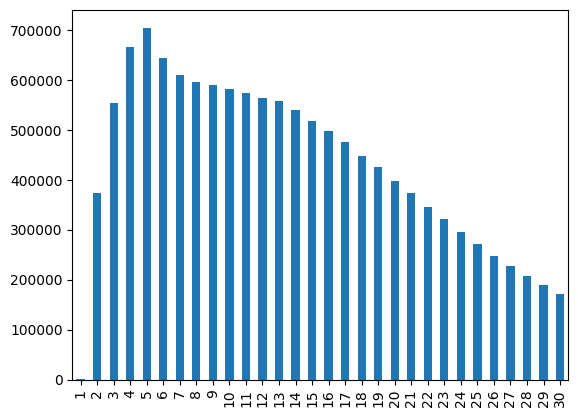

In [12]:
corpus_df['sentence_length'].value_counts().sort_index()[:30].plot(kind='bar')

In [ ]:
corpus_df[corpus_df.sentence_length>=182]

In [16]:
df_filtered = corpus_df[~corpus_df['sentence'].str.contains("\?")]
df_filtered = df_filtered[~df_filtered['sentence'].str.contains("herf")]
df_filtered = df_filtered[~df_filtered['sentence'].str.contains("-RCB")]

In [17]:
df_filtered = df_filtered[(df_filtered.sentence_length>=21) & (df_filtered.sentence_length<=30)]
df_filtered

,sentence,sentence_length
5,The an- tlu-opologist and the ethnologist find...,21
11,free stresses the complete absence of external...,26
12,We have brought together a group of experts fr...,21
15,The kit is already stored in the cockpit and o...,21
18,English: Finless porpoise German ... be linked...,24
...,...,...
14621831,Large quantities of hydrogen are used in the H...,23
14621835,"Moreover, it provides sanctuary to a variety o...",27
14621836,"Mountainous and subalpine zones up to 2,000 me...",24
14621840,"If you plan on growing dill for its seeds, har...",24


In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df_filtered.head(50)

,sentence,sentence_length
0,"Large international companies are involved in bauxite, iron ore, diamond, and gold mining operations.",14
2,"Of course, for many in the media, “hydrogen sulphide delivery helps prevent disease damage in cells in certain disease models” will always be trumped by “farts cure cancer” when it comes to headlines.",33
5,The an- tlu-opologist and the ethnologist find in trop- ical America some of the most complicated and interesting problems of research.,21
6,"ORDER ODONATA (Damselflies and Dragonflies) Diagnosis: large, to over three inches long; four wings, transparent and membranous, held vertically (damselflies) or laterally (dragonflies) at rest; chew- ing mouth parts, tooth-like; nymphs aquatic, feeding on mosquito larvae to small fish; adults terrestrial, feeding on other insects (Figure 14.27).",47
8,"Sex brought the variations that could allow organisms to survive change” (2000, p. 163).",14
9,"Homo erectus had a long tenure; the earliest Homo erectus fossils are dated to roughly 1.8 million years ago, while the youngest fossils assigned to this species date to roughly 300 thousand years ago (ka).",35
11,free stresses the complete absence of external rule and the full right to make all of one's own decisions <you're free to do as you like>.,26
12,"We have brought together a group of experts from across Canada, the U.S., and Mexico to develop a practical reform agenda.",21
15,The kit is already stored in the cockpit and on the aft deck ready to be moved as quickly as possible.,21
18,English: Finless porpoise German ... be linked with reproductive cycles and ... occupy an important place in the daily life of people in ...,24


In [18]:
sampled_df = df_filtered.groupby('sentence_length').apply(lambda x: x.sample(1000)).reset_index(drop=True)

In [19]:
sampled_df

,sentence,sentence_length
0,"Porzana millsi (often incorrectly spelled ""mil...",21
1,Cephalopods The cephalopods (class Cephalopoda...,21
2,"Consumer expectations are rising, industrial p...",21
3,"Though deaths are certainly rare, Balestra doe...",21
4,Apples grown in Florida require a pollinator s...,21
...,...,...
9995,"Because of that , the price of electricity it ...",30
9996,I got involved in genetics and genomics resear...,30
9997,"Beyond the nuisance factor, mosquitoes are car...",30
9998,Nearly all the land was unfenced and at first ...,30


### kmeans

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features

# Apply TF-IDF to your data
tfidf_matrix = vectorizer.fit_transform(sampled_df['sentence'])

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
reduced_feature= pca.fit_transform(tfidf_matrix.toarray())

In [25]:
from sklearn.cluster import KMeans

# Number of clusters
n_clusters = 100  # This is an example; adjust based on your dataset

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(reduced_feature)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
import numpy as np

# Select samples from each cluster
selected_indices = []
for i in range(1000):
    cluster_indices = np.where(clusters == (i% 100))[0]
    selected_indices.extend(np.random.choice(cluster_indices, size=1))  # Change size based on how many you want from each cluster

# Create the final dataset
final_df = df_filtered.iloc[selected_indices].sample(n=1000, random_state=66)  # Randomly select 1,000 rows from the chosen samples

In [29]:
final_df

,sentence,sentence_length
52251,1987 – Gordon B. Hinckley of the First Preside...,27
50993,Your basic type dominates your overall persona...,22
21465,Deep taxonomic sampling and rigorous phylogene...,27
31652,"He had been posted about me, as one who had wr...",27
29459,The cuttlefish in the center could be said to ...,21
...,...,...
30227,Life for most insects begins as a larva or nym...,22
52209,"In this study, 46,533 transcripts from 46,070 ...",24
25485,` PlayStation Move ' is a motion-sensing game ...,24
35229,Jack was a member of the Little Country Church...,26


In [30]:
final_df.to_csv("/content/drive/MyDrive/EECS 595/Final project/processing/fillered2.csv")

In [ ]:
final_ex.to_csv("./filleted1500.csv")

In [35]:
df = pd.read_csv("/filleted1500.csv",index_col=0)
df.tail(50)

,sentence,sentence_length
877048,We then examined whether response biases exist...,27
3030130,_ (Today reflecting on the legacy that biolog...,27
9976485,so for the past two years these dogs have all ...,27
13028211,The highest energy cosmic rays measured to dat...,27
10803060,"It seems feasible that genetic defects, as wel...",27
11189596,[3] The typical analysis of cognitive science ...,27
10974382,Check the pesticide label of each product to m...,27
2357945,They can also be easily remedied: One word fro...,27
8136453,The BCS theory also provided a foundation for ...,27
9327718,The main public health threats vary according ...,27


In [44]:
overlap_indexes = df.index.intersection(final_df.index)
if not overlap_indexes.empty:
    print("Overlapping indexes")
else:
    print("No overlapping indexes")

Overlapping indexes


In [45]:
print(overlap_indexes)

Int64Index([24749, 3963], dtype='int64')


In [48]:
excluded = df_filtered[~df_filtered.index.isin(df.index.union(final_df.index))]
excluded = excluded[excluded.sentence_length==27]
final_ex=pd.concat([final_df,excluded.sample(n = 3)],axis = 0)
final_ex= final_ex[~final_ex.index.isin(overlap_indexes)]

In [55]:
final_ex.to_csv("fillered2.csv")

OSError: ignored